# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds3001f25/eda_assignment.git`
### Do Q1, Q2, and Q3.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

**Q2 part 1+2**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

airbnb = pd.read_csv("./airbnb_hw.csv")
print('Dimensions:', airbnb.shape, '\n') # there are 30478 observations and 13 variables

print('Variables:', airbnb.columns) #list of variables used
airbnb.head()


Dimensions: (30478, 13) 

Variables: Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


**Q2 Part 3**


In [ ]:
cross_tab = pd.crosstab(airbnb['Room Type'], airbnb['Property Type'])
#print(cross_tab) that's ugly
cross_tab
#apartments and houses are the most common property type
#bed & breakfasts, houses, and other are more common as private rooms rather than entire properties

Property Type,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Castle,Chalet,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Tent,Townhouse,Treehouse,Villa
Room Type,,,,,,,,,,,,,,,,,,,
Entire home/apt,15669,13,7,4,1,6,0,0,72,4,752,0,1,392,14,0,83,0,4
Private room,10748,155,1,0,1,1,1,1,22,16,1258,2,0,312,29,4,52,1,4
Shared room,685,12,0,0,0,0,0,0,0,11,80,0,0,49,4,0,1,3,0


**Q2 Part 4**


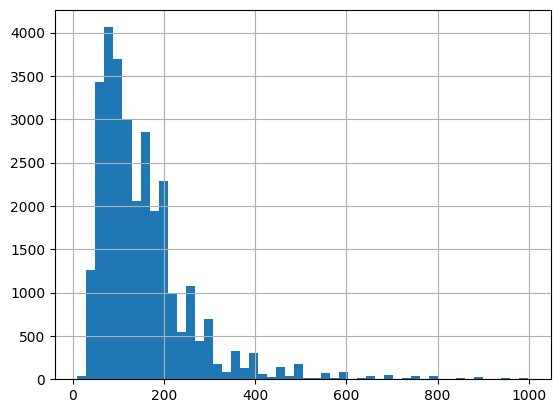

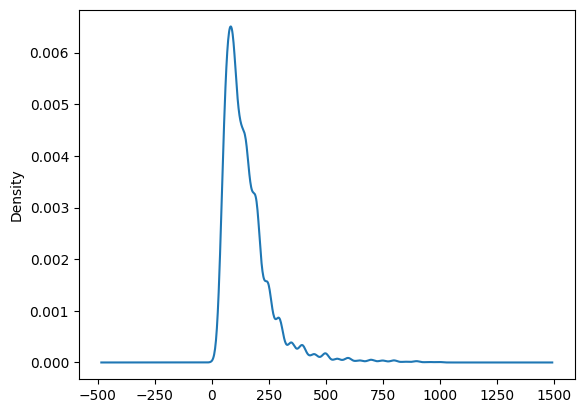

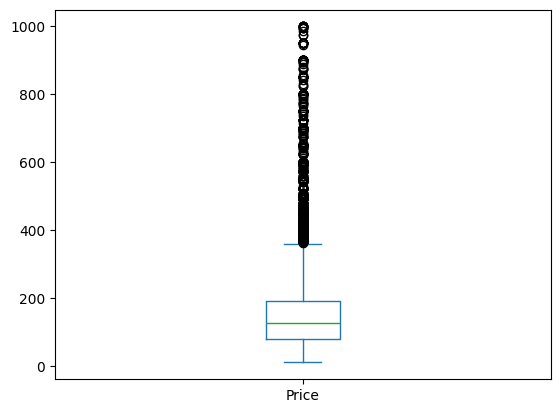

,Price
count,30297.000000
mean,153.357032
std,108.895698
min,10.000000
25%,80.000000
50%,125.000000
75%,192.000000
max,999.000000


In [ ]:
airbnb['Price'] = pd.to_numeric(airbnb['Price'], errors='coerce') #airbnb was not an int value

airbnb['Price'].hist(bins=50) #histogram
plt.show()

airbnb['Price'].plot.kde() #kernel density
plt.show()

airbnb['Price'].plot.box() #boxplot
plt.show()

airbnb['Price'].describe() #stat description of data

# The data is badly scaled, there are long tails and many high outliers


**Q2 Part 4 (log)**



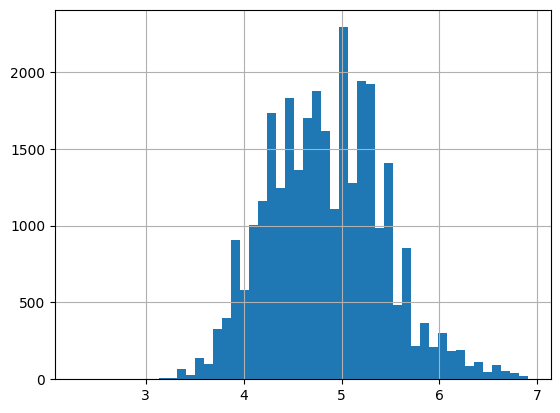

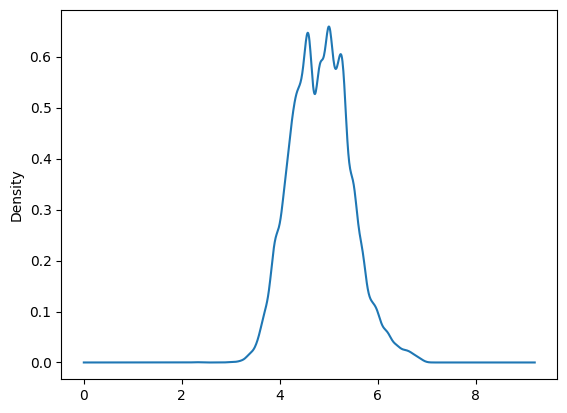

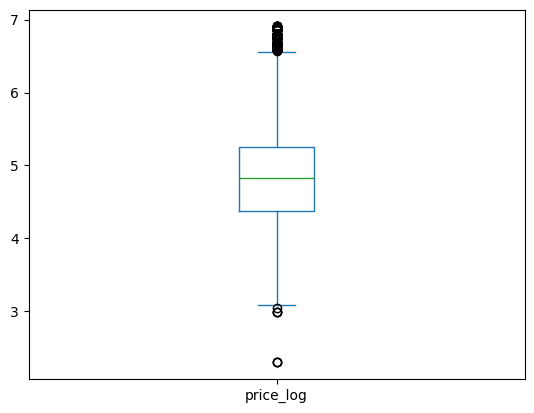

,price_log
count,30297.000000
mean,4.845370
std,0.596999
min,2.302585
25%,4.382027
50%,4.828314
75%,5.257495
max,6.906755


In [ ]:
airbnb['Price'] = pd.to_numeric(airbnb['Price'], errors='coerce') #airbnb was not an int value

airbnb['price_log'] = np.log(airbnb['Price'])

airbnb['price_log'].hist(bins=50) #histogram
plt.show()

airbnb['price_log'].plot.kde() #kernel density
plt.show()

airbnb['price_log'].plot.box() #boxplot
plt.show()

airbnb['price_log'].describe() #stat description of data

#the data still has high outliers. but it is a lot more normal than the original data


**Q2 Part 5**


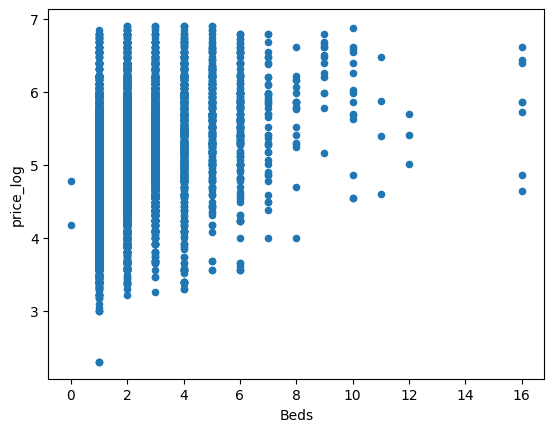

,count,mean,std,min,25%,50%,75%,max
Beds,,,,,,,,
0.0,2.0,92.000000,38.183766,65.0,78.50,92.0,105.50,119.0
1.0,20307.0,124.757670,75.685752,10.0,75.00,100.0,155.00,950.0
2.0,6561.0,186.702332,115.044205,25.0,115.00,160.0,225.00,999.0
3.0,2029.0,234.928043,142.288189,26.0,140.00,200.0,299.00,999.0
4.0,766.0,280.554830,175.512312,27.0,150.00,240.0,363.75,999.0
5.0,274.0,322.000000,190.319415,35.0,186.00,285.0,425.00,995.0
6.0,166.0,316.313253,201.157585,35.0,183.75,271.0,399.00,900.0
7.0,45.0,341.377778,220.116631,55.0,177.00,300.0,445.00,900.0
8.0,20.0,331.850000,155.652202,55.0,218.75,339.5,408.75,750.0


In [ ]:
airbnb.plot.scatter(x='Beds', y='price_log')
plt.show()
#The data is concentrated in the left of the plot - so there are fewer beds but the price is relatively the same

airbnb.groupby('Beds')['Price'].describe()
#the standard deviation is high when the average price is high
#airbnb.loc[:,['Beds', 'Price']].groupby('Beds').describe()  <-- this inputs the same data


**Q2 Part 6**

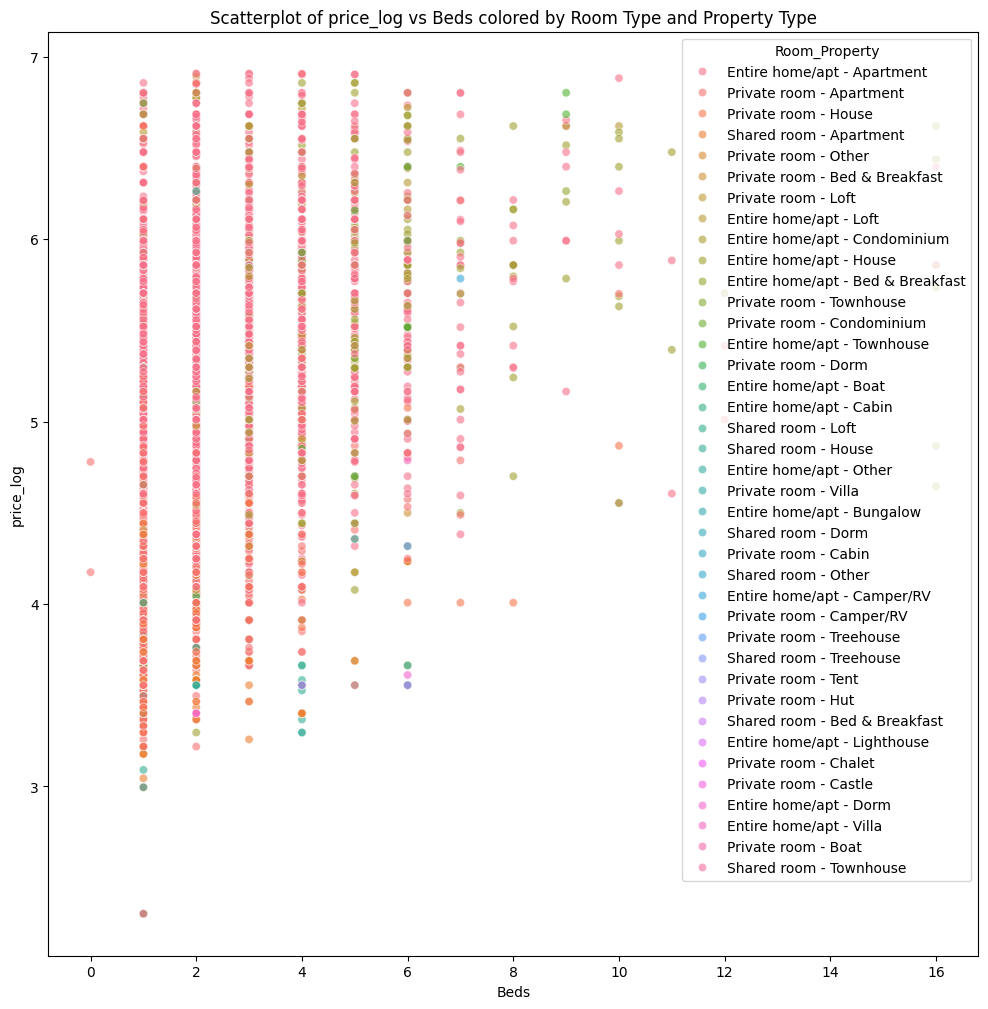


 Description of Price conditional on Room Type and Property Type:


count        mean         std    min  \
Room Type       Property Type                                             
Entire home/apt Apartment        15550.0  200.210161  109.967435   10.0   
                Bed & Breakfast     13.0  184.538462  119.814172   85.0   
                Boat                 7.0  158.428571   51.110524  100.0   
                Bungalow             4.0  150.750000   46.464144   87.0   
                Cabin                1.0  250.000000         NaN  250.0   
                Camper/RV            6.0  114.333333  107.685963   45.0   
                Condominium         71.0  281.126761  175.313998   80.0   
                Dorm                 4.0   44.250000   24.060687   30.0   
                House              723.0  234.554633  159.785974   27.0   
                Lighthouse           1.0   39.000000         NaN   39.0   
                Loft               379.0  284.910290  184.515517   55.0   
                Other               10.0  290.800000  273.526273   66.0   
                Townhouse           81.0  242.037037  166.755243   66.0   
                Villa                3.0  206.333333   89.667906  120.0   
Private room    Apartment        10741.0   91.605903   46.356168   10.0   
                Bed & Breakfast    155.0   97.161290   47.031971   32.0   
                Boat                 1.0  120.000000         NaN  120.0   
                Cabin                1.0   80.000000         NaN   80.0   
                Camper/RV            1.0   39.000000         NaN   39.0   
                Castle               1.0  150.000000         NaN  150.0   
                Chalet               1.0   99.000000         NaN   99.0   
                Condominium         22.0   98.590909   40.576394   46.0   
                Dorm                16.0   86.562500   40.738137   50.0   
                House             1258.0   77.750397   49.402650   25.0   
                Hut                  2.0   75.000000   35.355339   50.0   
                Loft               310.0   99.077419   63.875489   39.0   
                Other               28.0  176.642857  141.484252   39.0   
                Tent                 4.0  126.250000   94.989034   40.0   
                Townhouse           52.0   83.365385   30.578109   45.0   
                Treehouse            1.0   95.000000         NaN   95.0   
                Villa                4.0  126.250000   71.107313   60.0   
Shared room     Apartment          684.0   77.853801   57.875888   20.0   
                Bed & Breakfast     12.0  143.666667  245.328104   30.0   
                Dorm                11.0   73.181818   46.328864   30.0   
                House               79.0   46.822785   25.152743   10.0   
                Loft                49.0   78.816327   87.521824   30.0   
                Other                4.0  148.750000  134.806961   70.0   
                Townhouse            1.0   95.000000         NaN   95.0   
                Treehouse            3.0  167.666667  114.788211   95.0   

                                    25%    50%     75%    max  
Room Type       Property Type                                  
Entire home/apt Apartment        135.00  175.0  230.00  999.0  
                Bed & Breakfast  121.00  130.0  220.00  525.0  
                Boat             122.50  150.0  182.00  250.0  
                Bungalow         133.50  160.5  177.75  195.0  
                Cabin            250.00  250.0  250.00  250.0  
                Camper/RV         49.00   74.0  114.00  325.0  
                Condominium      155.00  200.0  360.00  850.0  
                Dorm              30.00   33.5   47.75   80.0  
                House            125.00  188.0  299.00  950.0  
                Lighthouse        39.00   39.0   39.00   39.0  
                Loft             160.00  220.0  350.00  985.0  
                Other            123.75  177.5  350.00  850.0  
                Townhouse        135.00  189.0  295.00  900.0  

In [87]:
import seaborn as sns

# a new column combining Room Type and Property Type for coloring
airbnb['Room_Property'] = airbnb['Room Type'] + ' - ' + airbnb['Property Type']

plt.figure(figsize=(12, 8)) # adjust the figure size for better readability
sns.scatterplot(data=airbnb, x='Beds', y='price_log', hue='Room_Property', alpha=0.6)
plt.title('Scatterplot of price_log vs Beds colored by Room Type and Property Type')
plt.show()

# description of Price conditional on Room Type and Property Type
price_description_by_room_property = airbnb.groupby(['Room Type', 'Property Type'])['Price'].describe()
print("\n Description of Price conditional on Room Type and Property Type:")
display(price_description_by_room_property)

#entire home/apt has the highest room type price on average
#other is often the highest property type price and standard deviation on average
#median seems to be the better measure because there are outliers present

**Q3.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

**Q3 part 1**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

drill = pd.read_csv("./drilling_rigs.csv")
print('Dimensions:', drill.shape, '\n')
#623 observations & 10 variables

print('Variables:', drill.columns)
drill.head()

# Some variables will have to be coerced because there are numbers and string "Not available" values together.
# Have to replace the "Not Available" values with NaN through coercion


Dimensions: (623, 10) 

Variables: Index(['Month',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)',
       'Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)',
       'Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)',
       'Active Well Service Rig Count (Number of Rigs)'],
      dtype='object')


,Month,"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)","Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)","Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",Active Well Service Rig Count (Number of Rigs)
0,1973 January,1120,99,Not Available,Not Available,Not Available,Not Available,Not Available,1219,1549
1,1973 February,1037,89,Not Available,Not Available,Not Available,Not Available,Not Available,1126,1677
2,1973 March,959,90,Not Available,Not Available,Not Available,Not Available,Not Available,1049,1805
3,1973 April,914,79,Not Available,Not Available,Not Available,Not Available,Not Available,993,1898
4,1973 May,974,72,Not Available,Not Available,Not Available,Not Available,Not Available,1046,1991


**Q3 part 2**

In [100]:
drill['time'] = pd.to_datetime(drill['Month'], format='mixed') #date formatting
drill.head()

,Month,"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)","Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)","Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",Active Well Service Rig Count (Number of Rigs),time,rig_count_diff
0,1973 January,1120,99,Not Available,Not Available,Not Available,Not Available,Not Available,1219,1549.0,1973-01-01,NaN
1,1973 February,1037,89,Not Available,Not Available,Not Available,Not Available,Not Available,1126,1677.0,1973-02-01,128.0
2,1973 March,959,90,Not Available,Not Available,Not Available,Not Available,Not Available,1049,1805.0,1973-03-01,128.0
3,1973 April,914,79,Not Available,Not Available,Not Available,Not Available,Not Available,993,1898.0,1973-04-01,93.0
4,1973 May,974,72,Not Available,Not Available,Not Available,Not Available,Not Available,1046,1991.0,1973-05-01,93.0


**Q3 part 3**

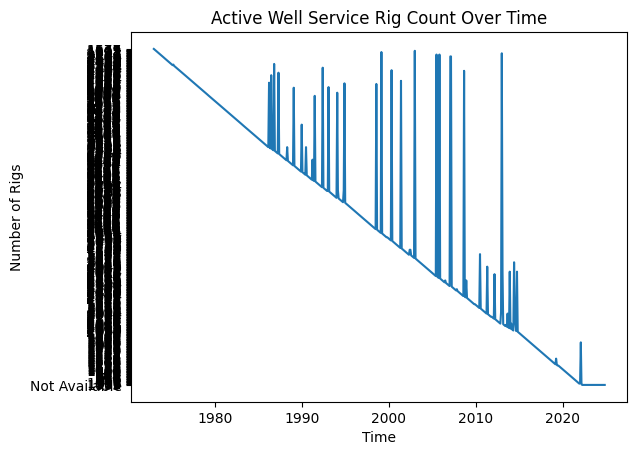

In [ ]:
figure = sns.lineplot(data=drill, x='time', y='Active Well Service Rig Count (Number of Rigs)') #create lineplot
figure.set(title="Active Well Service Rig Count Over Time", xlabel='Time', ylabel='Number of Rigs')
plt.show()
#The data is a mess - it is hard to read and formatted weirdly - I hope I did this correctly


**Q3 part 4**

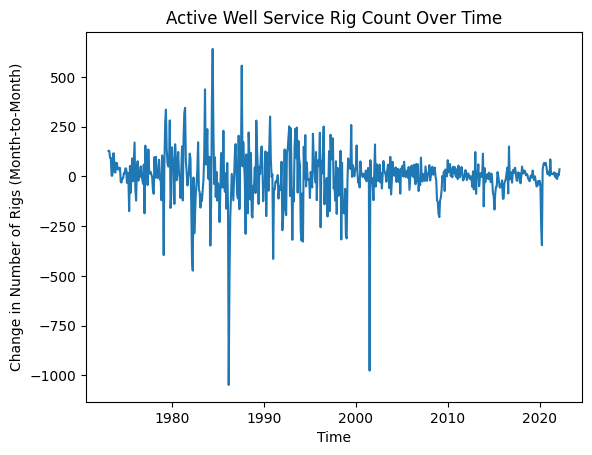

In [99]:
drill ['rig_count_diff'] = drill['Active Well Service Rig Count (Number of Rigs)'].diff()
figure = sns.lineplot(data=drill, x='time', y='rig_count_diff')
figure.set(title="Active Well Service Rig Count Over Time", xlabel='Time', ylabel='Change in Number of Rigs (Month-to-Month)')
plt. show()
#this graph looks like a graph of data now. But the data is cramped and hard to read. It also has a lot of outliers that might be messing with the scaling

**Q3 part 5**

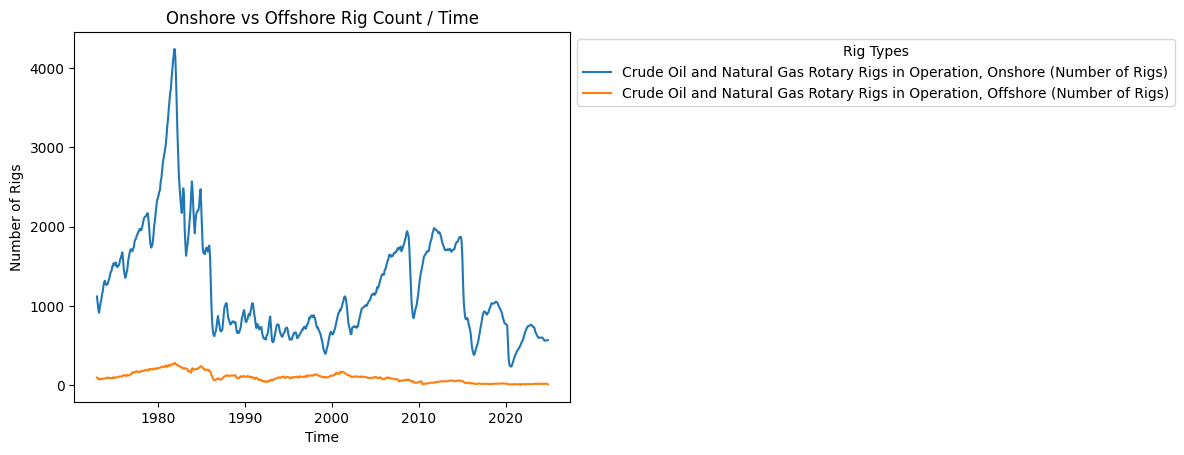

In [97]:
melted_drill = pd.melt(drill, id_vars=['time'],
                        value_vars=['Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)',
                                    'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)'],
                       var_name='rig_type', value_name='rig_count')
figure = sns.lineplot(data=melted_drill, x='time', y='rig_count', hue='rig_type')
figure.set(title="Onshore vs Offshore Rig Count / Time", xlabel='Time', ylabel='Number of Rigs')


plt.legend(title='Rig Types', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()
# creates a single plot with both on and off shore rig counts. This allows easier and cleaner data visualization to occur.